In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from stl import STL

In [3]:
dfm = pd.read_csv(
    '../../../data/co2_mm_mlo.txt',
    comment='#',
    delim_whitespace=True,
    header=None,
    names=['year','month','decimal','monthly','deseason','days','stdev','uncertainty']
)


In [ ]:
dfm['date'] = pd.to_datetime(dict(year=dfm.year, month=dfm.month, day=15))
dfm.set_index('date', inplace=True)


In [5]:
y_m = dfm['monthly']

In [6]:
stl_m = STL(period=12, seasonal_wdw=12, trend_wdw=36, inner_loops=2)
decomp_m = stl_m.fit_transform(y_m)
decomp_m.index = y_m.index

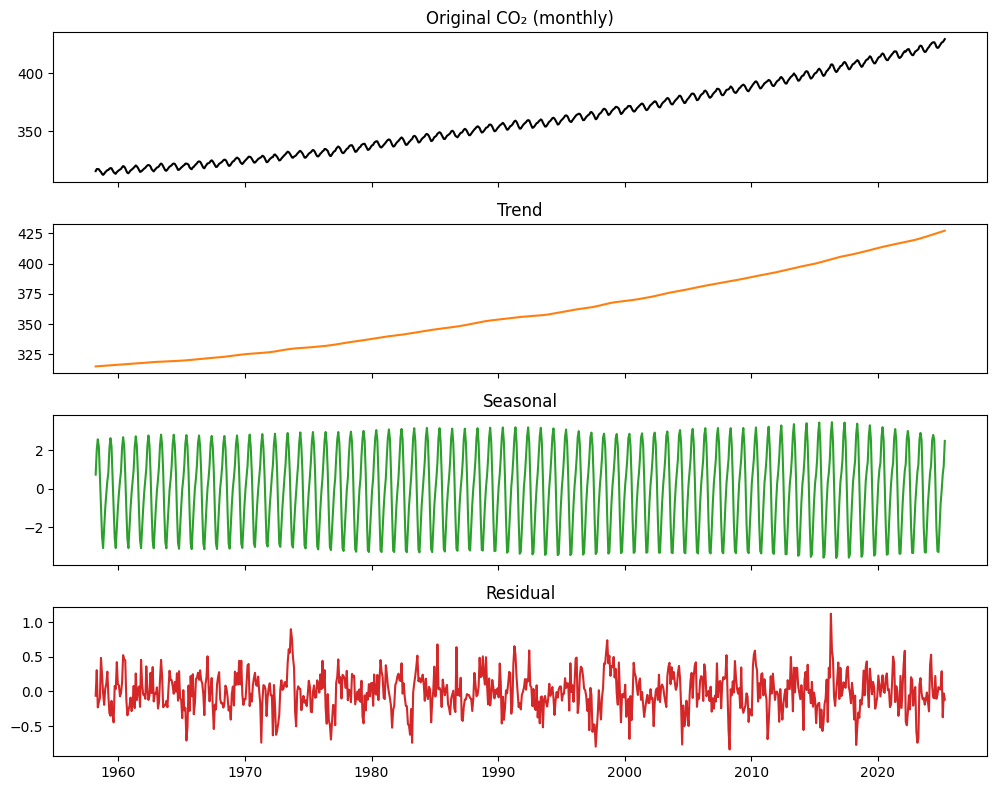

In [ ]:
fig, axes = plt.subplots(4,1, figsize=(10,8), sharex=True)
axes[0].plot(y_m, color='k');      axes[0].set_title('CO2 (monthly)')
axes[1].plot(decomp_m['trend'], color='C1'); axes[1].set_title('Trend')
axes[2].plot(decomp_m['seasonal'], color='C2'); axes[2].set_title('Seasonal')
axes[3].plot(decomp_m['residual'], color='C3'); axes[3].set_title('Residual')
plt.tight_layout()
plt.show()

change seasonality by time?

In [9]:
windows = 60 #5y by 12m
season = decomp_m['seasonal']
rolling = season.rolling(window=windows, center=True)
rolling = rolling.apply(lambda x: x.max()-x.min())

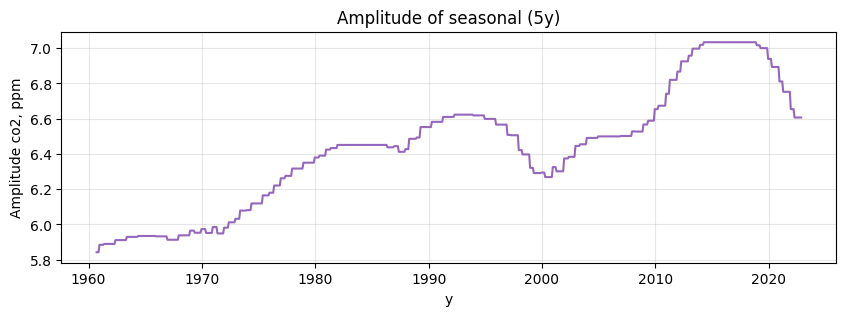

In [10]:
plt.figure(figsize=(10,3))
plt.plot(rolling, color='C4')
plt.title('Amplitude of seasonal (5y)')
plt.ylabel("Amplitude co2, ppm")
plt.xlabel("y")
plt.grid(alpha=.3)
plt.show()

In [11]:
# // linear approximation of trend. ppm per year
import numpy as np
x = dfm['decimal'].values
y_trend = decomp_m['trend'].values
s,i = np.polyfit(x, y_trend, 1)
print('Increasing of co2 by trend:', s, 'ppm p year')

Increasing of co2 by trend: 1.6502556069342764 ppm p year
